<a href="https://colab.research.google.com/github/ViniciusCastillo/Aprendendo/blob/master/BootcampAlura_Modulo1_Aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analise dos valores de procedimetnos do Data SUS 

In [1]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# configurando formato de apresentação de números
pd.options.display.float_format = "{:,.2f}".format


In [5]:
# importando os números
dados = pd.read_csv ("/content/A165345189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",")
# retirando os números de antes do nome dos estados
dados["Unidade da Federação"] = dados["Unidade da Federação"].str.replace("\d+", "")
dados["Unidade da Federação"] = dados["Unidade da Federação"].str.strip()
# selecionando apenas colunas com valores para todas as linhas
col_usaveis = dados.mean().index.tolist()
# adicionando coluna não numérica com os titulos das linhas
col_usaveis.insert(0, "Unidade da Federação")
# excluindo a coluna TOTAL
del col_usaveis[-1]
# criando a base apenas com a seleção de coluna
base_usavel = dados[col_usaveis]
# definindo index da base
base_usavel = base_usavel.set_index("Unidade da Federação")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [6]:
# validações
# base_usavel.head()
base_usavel.tail()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rio Grande do Sul,"1,049,252.33","3,182,913.14","8,571,312.11","16,592,432.80","30,134,255.70","51,064,610.03","45,897,704.82","52,928,695.92","51,972,416.77","51,679,350.79","53,759,674.01","56,391,647.77","56,233,758.74","57,910,170.98","59,592,124.91","57,565,742.08","55,696,920.94","61,522,380.02","52,101,637.77","65,111,965.49","61,590,828.91","64,402,291.62","63,090,640.55","69,137,004.88","66,062,629.79","65,222,011.32","67,569,409.19","64,189,115.30","62,244,282.80","65,488,387.87","56,964,528.31","69,933,577.14","66,486,835.62","69,108,367.47","67,570,770.09","70,074,754.73","70,884,009.17","65,079,794.92","66,556,015.62","66,097,030.85",...,"91,926,773.80","91,678,131.98","90,989,887.85","94,861,008.10","96,799,643.23","87,344,269.09","97,371,100.06","90,190,767.67","81,748,880.30","92,467,100.02","85,301,000.44","91,624,338.70","92,787,953.22","99,145,915.34","95,863,320.03","103,044,767.94","98,566,147.88","94,371,567.58","96,990,557.03","91,006,554.37","88,774,578.38","97,625,339.39","85,488,519.32","84,893,513.73","76,826,577.08","87,811,296.76","96,820,252.33","108,561,903.13","111,791,116.08","110,213,598.49","114,031,586.73","117,684,744.20","120,278,147.37","115,939,379.08","126,636,214.86","169,007,174.48","143,668,900.21","152,959,541.64","133,414,679.53","88,897,808.64"
Mato Grosso do Sul,"199,556.12","573,675.41","1,069,816.66","1,995,899.52","4,277,979.14","8,301,006.10","8,279,288.79","9,793,888.78","8,997,542.75","9,842,108.59","10,257,782.00","10,167,827.24","9,602,843.49","10,272,466.74","10,814,111.53","10,371,654.90","9,140,959.80","9,771,575.46","9,648,706.17","11,784,290.10","11,240,770.37","11,155,445.90","11,796,784.62","11,956,687.54","12,420,336.71","11,489,768.73","11,698,487.88","11,286,787.17","10,814,729.24","11,570,718.38","10,920,760.16","13,204,085.81","11,711,475.20","12,671,896.78","12,584,046.80","11,808,910.05","12,917,152.45","12,429,678.06","12,526,681.04","12,305,360.94",...,"17,062,906.92","17,068,192.56","17,143,032.30","17,435,039.90","18,239,321.45","16,963,131.37","17,677,185.62","16,363,926.26","16,149,109.15","16,902,636.63","16,964,922.58","17,259,392.23","18,147,562.63","19,143,242.28","17,905,638.97","18,126,954.44","19,217,982.14","18,904,364.43","18,812,185.96","18,316,480.80","17,844,511.04","18,654,501.49","17,877,667.41","17,395,566.03","15,854,121.13","17,502,042.14","19,724,932.28","23,640,103.64","22,626,766.85","21,557,775.36","22,041,499.99","21,965,122.22","25,051,353.45","24,801,033.12","25,629,175.15","31,301,145.27","32,470,257.97","32,314,475.72","24,045,534.61","13,922,456.93"
Mato Grosso,"63,562.50","232,444.62","927,219.59","1,740,439.60","5,394,225.43","8,213,438.64","7,929,894.93","9,416,367.68","9,390,588.03","9,378,197.25","9,450,300.60","9,789,875.38","8,987,811.95","8,843,061.60","9,237,298.80","9,459,192.80","9,210,598.63","10,039,582.41","9,326,576.40","11,680,730.78","11,102,643.47","11,495,694.05","11,386,425.93","11,658,855.38","12,339,077.28","11,600,187.11","11,262,247.37","11,734,970.74","11,065,381.68","11,839,990.16","10,826,512.86","13,243,684.10","12,240,702.64","12,781,426.23","11,614,062.90","12,193,931.16","12,213,130.6

In [8]:
# configurando cores do gráfico
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['legend.edgecolor'] = 'grey'
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['text.color'] = 'black'
# colocando em ordem alfabética
base_usavel = base_usavel.sort_index()


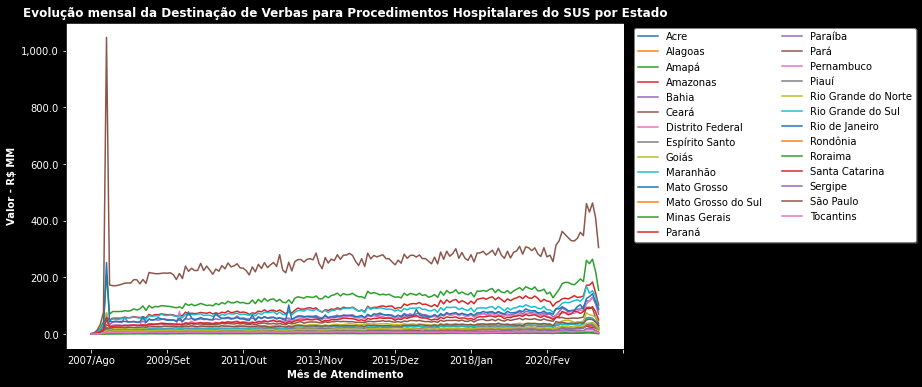

In [9]:
# construindo o gráfico
ax = base_usavel.T.plot(figsize=(10,6))
# ajustando escala do eixo 
escalaY = 1e6
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))

# ajustando a posição da legenda
ax.legend(loc='upper center', bbox_to_anchor=(1.27, 1),
          ncol=2, fancybox=True, shadow=True)

# definindo titulos do gráfico e dos exios
plt.ylabel("Valor - R$ MM", fontweight="bold", color="white")
plt.xlabel("Mês de Atendimento", fontweight="bold", color="white")
plt.title("Evolução mensal da Destinação de Verbas para Procedimentos Hospitalares do SUS por Estado", fontweight="bold", color="white")

plt.show()


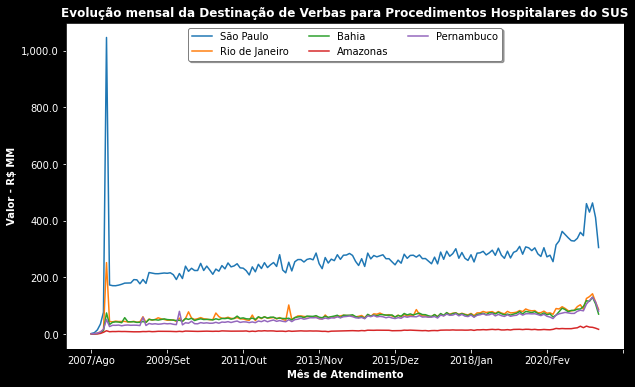

In [10]:
# definição dos estados que iremos mostrar
estados = ["São Paulo","Rio de Janeiro","Bahia","Amazonas","Pernambuco"]
# selecionando os estados
# ax = base_usavel.loc[base_usavel.index.isin(estados)].T.plot(figsize=(10,6))
ax = base_usavel.T[estados].plot(figsize=(10,6))
# ajustando escala do eixo 
escalaY = 1e6
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))

# ajustando a posição da legenda
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1),
          ncol=3, fancybox=True, shadow=True)
# definindo titulos do gráfico e dos exios
plt.ylabel("Valor - R$ MM", fontweight="bold", color="white")
plt.xlabel("Mês de Atendimento", fontweight="bold", color="white")
plt.title("Evolução mensal da Destinação de Verbas para Procedimentos Hospitalares do SUS", fontweight="bold", color="white")

plt.show()
